<a href="https://colab.research.google.com/github/ApahSaroj/WPI/blob/main/WPI_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/drive/MyDrive/DATA/WQC_test.xlsx')

In [5]:
df.head()

,Unnamed: 0,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI,WQC
0,0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.8,0.758000,6.534660,0.06211,0.249528,Excellent
1,1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.8,0.196062,8.138620,0.00960,0.216400,Excellent
2,2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.8,0.298875,3.855625,0.01280,0.183814,Excellent
3,3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.6,0.299590,2.238750,0.01536,0.219282,Excellent
4,4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.3,0.106000,5.600000,0.01000,0.165831,Excellent


In [6]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.drop('WQC', inplace=True, axis=1)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          487 non-null    float64
 1   DO          487 non-null    float64
 2   TDS         487 non-null    float64
 3   Alkalinity  487 non-null    float64
 4   EC          487 non-null    float64
 5   Na          487 non-null    float64
 6   Ca          487 non-null    float64
 7   Mg          487 non-null    float64
 8   K           487 non-null    float64
 9   F           487 non-null    float64
 10  Cl          487 non-null    float64
 11  Nitrate     487 non-null    float64
 12  Sulphate    487 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         487 non-null    float64
dtypes: float64(15)
memory usage: 57.2 KB


In [8]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     2
WPI           0
dtype: int64

In [9]:
#Lets remove the 2 rows of phosphate having null values

df.dropna(inplace=True)
df

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,8.14,8.7,84.0,52.0,147.8,4.48,44.0,20.0,1.17,0.285,7.80,0.758000,6.534660,0.06211,0.249528
1,7.70,8.8,110.0,76.0,188.0,8.61,44.0,36.0,3.46,0.401,14.80,0.196062,8.138620,0.00960,0.216400
2,7.60,7.5,75.0,44.0,128.0,8.11,28.0,20.0,2.80,0.379,14.80,0.298875,3.855625,0.01280,0.183814
3,8.20,9.1,76.0,56.0,127.0,6.30,44.0,18.0,1.65,0.396,9.60,0.299590,2.238750,0.01536,0.219282
4,7.31,7.3,84.0,52.0,140.0,5.50,28.0,20.0,1.61,0.265,8.30,0.106000,5.600000,0.01000,0.165831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,7.60,5.6,224.0,8.0,370.0,16.14,92.0,24.0,7.60,2.270,23.04,1.352000,104.480000,0.01500,0.419630
483,7.30,5.6,266.0,96.0,434.0,20.56,96.0,32.0,9.89,1.550,30.86,7.074000,61.068000,0.03300,0.432996
484,5.10,5.8,290.0,12.0,487.0,37.35,60.0,44.0,14.80,0.159,60.13,9.256000,89.910000,0.16300,0.326811
485,7.40,6.4,230.0,72.0,385.0,20.06,70.0,42.0,10.35,1.360,32.92,7.110435,48.500000,0.21900,0.509970


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(15)
memory usage: 60.6 KB


In [11]:
df.isnull().sum()

pH            0
DO            0
TDS           0
Alkalinity    0
EC            0
Na            0
Ca            0
Mg            0
K             0
F             0
Cl            0
Nitrate       0
Sulphate      0
Phosphate     0
WPI           0
dtype: int64

In [12]:
df.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535982,9.570000,0.046253,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526654,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [13]:
data=df
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485 entries, 0 to 486
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          485 non-null    float64
 1   DO          485 non-null    float64
 2   TDS         485 non-null    float64
 3   Alkalinity  485 non-null    float64
 4   EC          485 non-null    float64
 5   Na          485 non-null    float64
 6   Ca          485 non-null    float64
 7   Mg          485 non-null    float64
 8   K           485 non-null    float64
 9   F           485 non-null    float64
 10  Cl          485 non-null    float64
 11  Nitrate     485 non-null    float64
 12  Sulphate    485 non-null    float64
 13  Phosphate   485 non-null    float64
 14  WPI         485 non-null    float64
dtypes: float64(15)
memory usage: 60.6 KB


In [14]:
data.describe()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
count,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,7.808880,7.436784,115.889278,62.251546,196.757361,8.911093,43.756701,24.387629,3.042495,0.512101,14.180745,1.291492,14.829563,0.089608,0.293930
std,0.411552,1.106868,47.332843,20.104135,81.181745,5.730719,17.846411,10.829170,2.306840,0.495054,9.297846,1.840738,14.662305,0.156697,0.132472
min,5.100000,4.200000,56.000000,8.000000,98.000000,2.190000,14.000000,2.000000,0.500000,0.059000,3.800000,0.003985,0.792000,0.000000,0.103531
25%,7.550000,6.700000,84.000000,50.000000,140.000000,5.290000,32.000000,16.000000,1.770000,0.249000,8.600000,0.246000,5.544000,0.023700,0.222014
50%,7.860000,7.400000,102.000000,56.000000,171.100000,7.100000,40.000000,22.000000,2.420000,0.312000,11.000000,0.535982,9.570000,0.046253,0.254719
75%,8.100000,8.100000,129.000000,72.000000,220.000000,10.240000,52.000000,28.000000,3.400000,0.466000,16.400000,1.526654,18.030000,0.091000,0.312652
max,8.570000,13.500000,308.000000,170.000000,502.000000,48.350000,146.000000,84.000000,18.020000,3.060000,73.300000,9.716972,104.480000,1.765000,1.604375


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Scatter Plot For TDS vs WPI


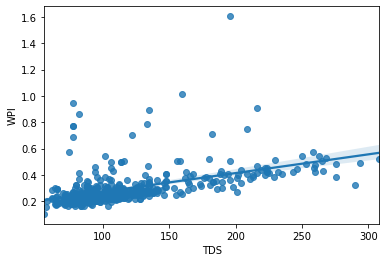

In [16]:
print("Scatter Plot For TDS vs WPI")
sns.regplot(x = 'TDS', y = 'WPI', data = data)
plt.show()

Scatter Plot For TDS vs EC


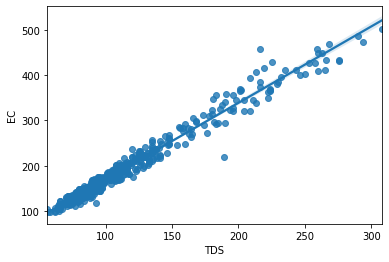

In [17]:
print("Scatter Plot For TDS vs EC")
sns.regplot(x = 'TDS', y = 'EC', data = data)
plt.show()

In [18]:
data.corr()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
pH,1.000000,0.211109,-0.236712,0.175510,-0.243521,-0.273298,-0.103435,-0.060885,-0.344524,-0.227349,-0.294046,-0.396854,-0.386411,-0.040246,-0.004190
DO,0.211109,1.000000,-0.222928,-0.036796,-0.226791,-0.181963,-0.182463,-0.067469,-0.268489,-0.232656,-0.177212,-0.139853,-0.291412,0.066248,-0.087564
TDS,-0.236712,-0.222928,1.000000,0.637716,0.984754,0.833671,0.892126,0.705149,0.754319,0.744330,0.841918,0.539486,0.831473,0.077804,0.508326
Alkalinity,0.175510,-0.036796,0.637716,1.000000,0.614956,0.381228,0.696089,0.658814,0.289176,0.360956,0.384024,0.094369,0.229730,-0.025792,0.306938
EC,-0.243521,-0.226791,0.984754,0.614956,1.000000,0.821030,0.880295,0.687292,0.744921,0.732718,0.826369,0.534420,0.833973,0.091789,0.513956
Na,-0.273298,-0.181963,0.833671,0.381228,0.821030,1.000000,0.634518,0.500436,0.709595,0.633003,0.973823,0.480209,0.660852,0.105225,0.437277
Ca,-0.103435,-0.182463,0.892126,0.696089,0.880295,0.634518,1.000000,0.585701,0.585581,0.624190,0.635604,0.413112,0.729384,0.039442,0.462190
Mg,-0.060885,-0.067469,0.705149,0.658814,0.687292,0.500436,0.585701,1.000000,0.462190,0.562817,0.526408,0.276092,0.538041,0.004944,0.331117
K,-0.344524,-0.268489,0.754319,0.289176,0.744921,0.709595,0.585581,0.462190,1.000000,0.633910,0.728000,0.599805,0.704721,0.064916,0.376962
F,-0.227349,-0.232656,0.744330,0.360956,0.732718,0.633003,0.624190,0.562817,0.633910,1.000000,0.651898,0.556951,0.713750,0.090891,0.478907


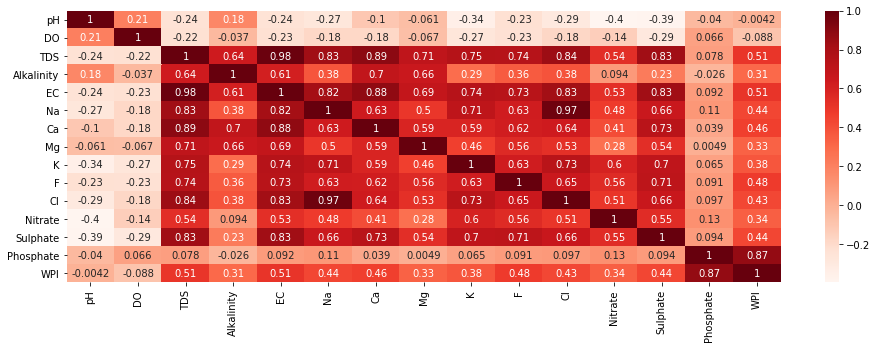

In [19]:
plt.figure(figsize = [16,5])
sns.heatmap(data.corr(),annot= True,cmap = 'Reds')
plt.show()

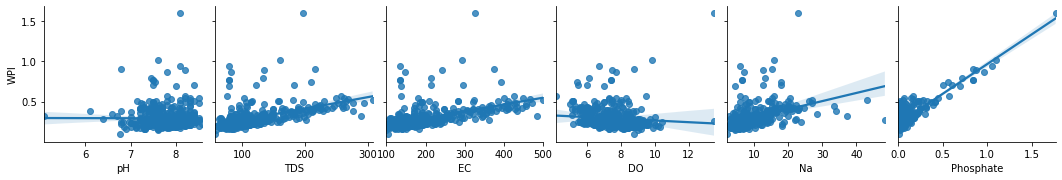

In [20]:
sns.pairplot(data = data, x_vars= ['pH','TDS','EC','DO','Na','Phosphate'], y_vars= 'WPI', kind = 'reg')
plt.show()

In [21]:
#Normalization (Min-Max Scalar) :

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(data)

In [22]:
data_scaled

array([[0.87608069, 0.48387097, 0.11111111, ..., 0.05538404, 0.03519008,
        0.09727633],
       [0.74927954, 0.49462366, 0.21428571, ..., 0.07085314, 0.00543909,
        0.07520334],
       [0.7204611 , 0.35483871, 0.07539683, ..., 0.02954657, 0.00725212,
        0.05349187],
       ...,
       [0.        , 0.17204301, 0.92857143, ..., 0.85948229, 0.09235127,
        0.14876932],
       [0.66282421, 0.23655914, 0.69047619, ..., 0.4601111 , 0.12407932,
        0.27080662],
       [0.7204611 , 0.29032258, 0.74206349, ..., 0.5704421 , 0.03966006,
        0.21256012]])

In [23]:
data_sc = pd.DataFrame(data_scaled, columns =['pH', 'DO', 'TDS','Alkalinity','EC','Na','Ca','Mg','K','F','Cl','Nitrate','Sulphate','Phosphate','WPI'])
data_sc

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,0.876081,0.483871,0.111111,0.271605,0.123267,0.049610,0.227273,0.219512,0.038242,0.075308,0.057554,0.077630,0.055384,0.035190,0.097276
1,0.749280,0.494624,0.214286,0.419753,0.222772,0.139081,0.227273,0.414634,0.168950,0.113962,0.158273,0.019775,0.070853,0.005439,0.075203
2,0.720461,0.354839,0.075397,0.222222,0.074257,0.128250,0.106061,0.219512,0.131279,0.106631,0.158273,0.030360,0.029547,0.007252,0.053492
3,0.893372,0.526882,0.079365,0.296296,0.071782,0.089038,0.227273,0.195122,0.065639,0.112296,0.083453,0.030434,0.013953,0.008703,0.077124
4,0.636888,0.333333,0.111111,0.271605,0.103960,0.071707,0.106061,0.219512,0.063356,0.068644,0.064748,0.010503,0.046370,0.005666,0.041510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,0.720461,0.150538,0.666667,0.000000,0.673267,0.302210,0.590909,0.268293,0.405251,0.736754,0.276835,0.138785,1.000000,0.008499,0.210614
481,0.634006,0.150538,0.833333,0.543210,0.831683,0.397964,0.621212,0.365854,0.535959,0.496834,0.389353,0.727893,0.581321,0.018697,0.219520
482,0.000000,0.172043,0.928571,0.024691,0.962871,0.761698,0.348485,0.512195,0.816210,0.033322,0.810504,0.952541,0.859482,0.092351,0.148769
483,0.662824,0.236559,0.690476,0.395062,0.710396,0.387132,0.424242,0.487805,0.562215,0.433522,0.418993,0.731644,0.460111,0.124079,0.270807


In [24]:
data_sc.corr()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
pH,1.000000,0.211109,-0.236712,0.175510,-0.243521,-0.273298,-0.103435,-0.060885,-0.344524,-0.227349,-0.294046,-0.396854,-0.386411,-0.040246,-0.004190
DO,0.211109,1.000000,-0.222928,-0.036796,-0.226791,-0.181963,-0.182463,-0.067469,-0.268489,-0.232656,-0.177212,-0.139853,-0.291412,0.066248,-0.087564
TDS,-0.236712,-0.222928,1.000000,0.637716,0.984754,0.833671,0.892126,0.705149,0.754319,0.744330,0.841918,0.539486,0.831473,0.077804,0.508326
Alkalinity,0.175510,-0.036796,0.637716,1.000000,0.614956,0.381228,0.696089,0.658814,0.289176,0.360956,0.384024,0.094369,0.229730,-0.025792,0.306938
EC,-0.243521,-0.226791,0.984754,0.614956,1.000000,0.821030,0.880295,0.687292,0.744921,0.732718,0.826369,0.534420,0.833973,0.091789,0.513956
Na,-0.273298,-0.181963,0.833671,0.381228,0.821030,1.000000,0.634518,0.500436,0.709595,0.633003,0.973823,0.480209,0.660852,0.105225,0.437277
Ca,-0.103435,-0.182463,0.892126,0.696089,0.880295,0.634518,1.000000,0.585701,0.585581,0.624190,0.635604,0.413112,0.729384,0.039442,0.462190
Mg,-0.060885,-0.067469,0.705149,0.658814,0.687292,0.500436,0.585701,1.000000,0.462190,0.562817,0.526408,0.276092,0.538041,0.004944,0.331117
K,-0.344524,-0.268489,0.754319,0.289176,0.744921,0.709595,0.585581,0.462190,1.000000,0.633910,0.728000,0.599805,0.704721,0.064916,0.376962
F,-0.227349,-0.232656,0.744330,0.360956,0.732718,0.633003,0.624190,0.562817,0.633910,1.000000,0.651898,0.556951,0.713750,0.090891,0.478907


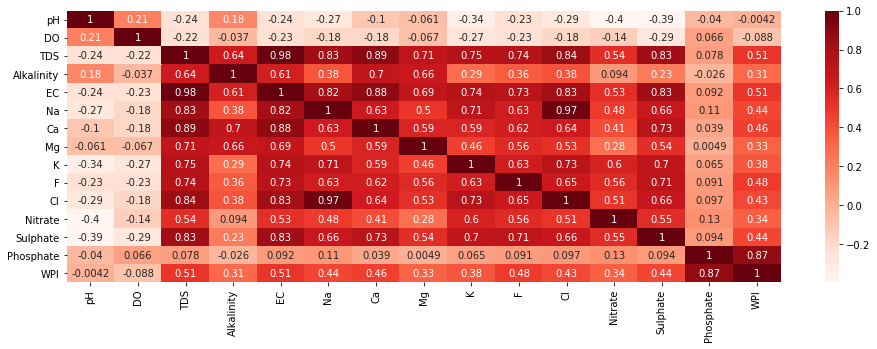

In [25]:
plt.figure(figsize = [16,5])
sns.heatmap(data_sc.corr(),annot= True,cmap = 'Reds')
plt.show()

In [26]:
# Standardization (Standard Scalar) :

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled1 = scaler.fit_transform(data)

In [27]:
data_scaled1

array([[ 0.80539363,  1.14243172, -0.67441977, ..., -0.56631394,
        -0.17565953, -0.33553114],
       [-0.2648336 ,  1.23287003, -0.12455113, ..., -0.45680755,
        -0.51111301, -0.58586554],
       [-0.50806706,  0.05717193, -0.86475891, ..., -0.74921841,
        -0.49067041, -0.83209992],
       ...,
       [-6.58890358, -1.48027943,  3.68223174, ...,  5.12593052,
         0.4688541 ,  0.24846176],
       [-0.99453398, -0.93764954,  2.41330412, ...,  2.29876552,
         0.82659959,  1.63251251],
       [-0.50806706, -0.48545796,  2.68823844, ...,  3.07980314,
        -0.12525895,  0.9719267 ]])

In [28]:
data_sc1 = pd.DataFrame(data_scaled1, columns =['pH', 'DO', 'TDS','Alkalinity','EC','Na','Ca','Mg','K','F','Cl','Nitrate','Sulphate','Phosphate','WPI'])
data_sc1

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
0,0.805394,1.142432,-0.674420,-0.510449,-0.603681,-0.774016,0.013647,-0.405586,-0.812552,-0.459214,-0.686969,-0.290124,-0.566314,-0.175660,-0.335531
1,-0.264834,1.232870,-0.124551,0.684568,-0.107985,-0.052594,0.013647,1.073430,0.181173,-0.224654,0.066671,-0.595718,-0.456808,-0.511113,-0.585866
2,-0.508067,0.057172,-0.864759,-0.908788,-0.847830,-0.139934,-0.883817,-0.405586,-0.105228,-0.269139,0.066671,-0.539806,-0.749218,-0.490670,-0.832100
3,0.951334,1.504185,-0.843610,-0.311279,-0.860161,-0.456101,0.013647,-0.590463,-0.604261,-0.234764,-0.493176,-0.539417,-0.859607,-0.474316,-0.564086
4,-1.213444,-0.123705,-0.674420,-0.510449,-0.699861,-0.595844,-0.883817,-0.405586,-0.621618,-0.499655,-0.633138,-0.644696,-0.630126,-0.508558,-0.967988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,-0.508067,-1.661156,2.286411,-2.701313,2.136213,1.262734,2.706040,-0.035832,1.977688,3.554592,0.953813,0.032905,6.120661,-0.476616,0.949859
481,-1.237767,-1.661156,3.174661,1.680415,2.925382,2.034812,2.930407,0.703676,2.971413,2.098703,1.795736,3.144652,3.156815,-0.361626,1.050858
482,-6.588904,-1.480279,3.682232,-2.502144,3.578912,4.967662,0.911111,1.812939,5.102063,-0.713995,4.947028,4.331270,5.125931,0.468854,0.248462
483,-0.994534,-0.937650,2.413304,0.485399,2.321175,1.947473,1.472027,1.628062,3.171026,1.714510,2.017521,3.164466,2.298766,0.826600,1.632513


In [29]:
data_sc1.corr()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,K,F,Cl,Nitrate,Sulphate,Phosphate,WPI
pH,1.000000,0.211109,-0.236712,0.175510,-0.243521,-0.273298,-0.103435,-0.060885,-0.344524,-0.227349,-0.294046,-0.396854,-0.386411,-0.040246,-0.004190
DO,0.211109,1.000000,-0.222928,-0.036796,-0.226791,-0.181963,-0.182463,-0.067469,-0.268489,-0.232656,-0.177212,-0.139853,-0.291412,0.066248,-0.087564
TDS,-0.236712,-0.222928,1.000000,0.637716,0.984754,0.833671,0.892126,0.705149,0.754319,0.744330,0.841918,0.539486,0.831473,0.077804,0.508326
Alkalinity,0.175510,-0.036796,0.637716,1.000000,0.614956,0.381228,0.696089,0.658814,0.289176,0.360956,0.384024,0.094369,0.229730,-0.025792,0.306938
EC,-0.243521,-0.226791,0.984754,0.614956,1.000000,0.821030,0.880295,0.687292,0.744921,0.732718,0.826369,0.534420,0.833973,0.091789,0.513956
Na,-0.273298,-0.181963,0.833671,0.381228,0.821030,1.000000,0.634518,0.500436,0.709595,0.633003,0.973823,0.480209,0.660852,0.105225,0.437277
Ca,-0.103435,-0.182463,0.892126,0.696089,0.880295,0.634518,1.000000,0.585701,0.585581,0.624190,0.635604,0.413112,0.729384,0.039442,0.462190
Mg,-0.060885,-0.067469,0.705149,0.658814,0.687292,0.500436,0.585701,1.000000,0.462190,0.562817,0.526408,0.276092,0.538041,0.004944,0.331117
K,-0.344524,-0.268489,0.754319,0.289176,0.744921,0.709595,0.585581,0.462190,1.000000,0.633910,0.728000,0.599805,0.704721,0.064916,0.376962
F,-0.227349,-0.232656,0.744330,0.360956,0.732718,0.633003,0.624190,0.562817,0.633910,1.000000,0.651898,0.556951,0.713750,0.090891,0.478907


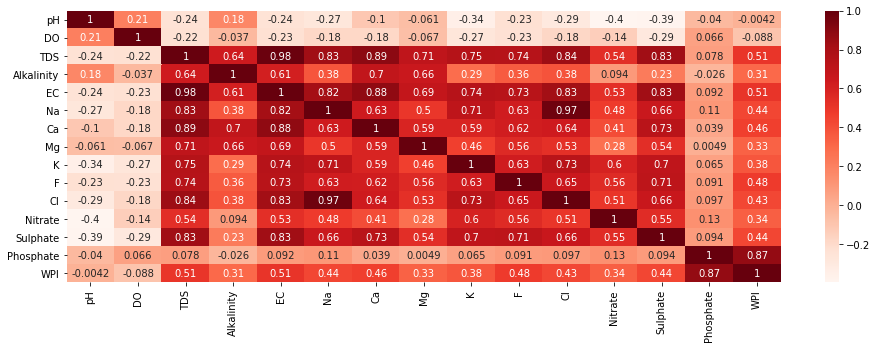

In [30]:
plt.figure(figsize = [16,5])
sns.heatmap(data_sc1.corr(),annot= True,cmap = 'Reds')
plt.show()

Even after standardising and normalising the data the correlation of WPI with other variables are same..

In [31]:
X = data[['pH', 'DO', 'TDS', 'Alkalinity', 'EC', 'Na', 'Ca', 'Mg', 'F', 'Cl','Nitrate', 'Sulphate','Phosphate']]
y = data['WPI']

In [32]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.70,random_state = 100)

In [34]:
X_train.head()

,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,F,Cl,Nitrate,Sulphate,Phosphate
253,8.10,7.15,92.0,48.0,168.0,3.87,36.0,24.0,0.244,5.88,0.210000,11.560,0.0310
230,8.20,7.50,93.0,44.0,143.0,4.69,32.0,28.0,0.211,9.60,0.472222,23.560,0.0130
127,8.10,7.20,112.0,64.0,171.0,7.86,36.0,30.0,0.310,12.60,1.137319,11.180,0.0594
189,7.80,8.60,84.0,52.0,155.0,4.71,24.0,24.0,0.213,7.71,0.309000,14.054,0.1180
269,7.69,7.20,73.0,38.0,116.2,8.19,32.0,12.0,0.322,11.90,0.553118,15.699,0.0700


In [35]:
X_train_sm = sm.add_constant(X_train)

In [36]:
X_train_sm.head()

,const,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,F,Cl,Nitrate,Sulphate,Phosphate
253,1.0,8.10,7.15,92.0,48.0,168.0,3.87,36.0,24.0,0.244,5.88,0.210000,11.560,0.0310
230,1.0,8.20,7.50,93.0,44.0,143.0,4.69,32.0,28.0,0.211,9.60,0.472222,23.560,0.0130
127,1.0,8.10,7.20,112.0,64.0,171.0,7.86,36.0,30.0,0.310,12.60,1.137319,11.180,0.0594
189,1.0,7.80,8.60,84.0,52.0,155.0,4.71,24.0,24.0,0.213,7.71,0.309000,14.054,0.1180
269,1.0,7.69,7.20,73.0,38.0,116.2,8.19,32.0,12.0,0.322,11.90,0.553118,15.699,0.0700


In [37]:
lr = sm.OLS(y_train,X_train_sm)

In [38]:
lr_model = lr.fit()

In [39]:
lr_model.params

const        -0.223191
pH            0.047611
DO           -0.007615
TDS           0.000175
Alkalinity    0.000344
EC            0.000087
Na            0.000212
Ca            0.000931
Mg           -0.000004
F             0.047848
Cl            0.000392
Nitrate       0.001771
Sulphate      0.000280
Phosphate     0.713963
dtype: float64

In [40]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WPI   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.029e+05
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        14:21:32   Log-Likelihood:                 1870.1
No. Observations:                 339   AIC:                            -3712.
Df Residuals:                     325   BIC:                            -3659.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2232      0.001   -185.473      0.000      -0.226      -0.221
pH             0.0476      0.000    310.245      0.000       0.047       0.048
DO            -0.0076   5.39e-05   -141.206      0.000      -0.008      -0.008
TDS            0.0002   9.38e-06     18.666      0.000       0.000       0.000
Alkalinity     0.0003   8.17e-06     42.132      0.000       0.000       0.000
EC          8.746e-05    3.8e-06     23.043      0.000       8e-05    9.49e-05
Na             0.0002   5.49e-05      3.864      0.000       0.000       0.000
Ca             0.0009   8.88e-06    104.851      0.000       0.001       0.001
Mg         -3.927e-06   9.04e-06     -0.435      0.664   -2.17e-05    1.38e-05
F              0.0478      0.000    276.152      0.000       0.048       0.048
Cl             0.0004   3.49e-05     11.254      0.000       0.000       0.000
Nitrate        0.0018   3.93e-05     45.053      0.000       0.002       0.002
Sulphate       0.0003   1.31e-05     21.399      0.000       0.000       0.000
Phosphate      0.7140      0.000   2041.057      0.000       0.713       0.715
==============================================================================
Omnibus:                      260.000   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6618.658
Skew:                           2.875   Prob(JB):                         0.00
Kurtosis:                      23.869   Cond. No.                     5.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
y_train_predict = lr_model.predict(X_train_sm)

In [42]:
res = y_train - y_train_predict

In [43]:
print(res)

253   -0.000768
230   -0.000117
127   -0.000427
189   -0.000232
269    0.000361
         ...   
345   -0.000697
361   -0.000413
324   -0.000313
281    0.000978
8      0.000540
Length: 339, dtype: float64


Text(0.5, 1.0, 'Residual Plot - Diff between Y-pred and y')

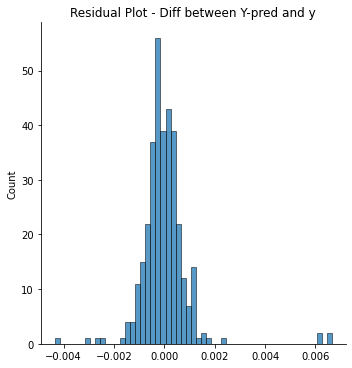

In [44]:
sns.displot(res)
plt.title("Residual Plot - Diff between Y-pred and y")

In [45]:
X_test_sm = sm.add_constant(X_test)

In [46]:
X_test_sm.head()

,const,pH,DO,TDS,Alkalinity,EC,Na,Ca,Mg,F,Cl,Nitrate,Sulphate,Phosphate
176,1.0,8.24,8.20,96.0,68.0,152.0,3.62,46.0,26.0,0.367,5.20,0.206423,12.37600,0.014500
411,1.0,7.60,9.85,160.0,88.0,293.0,16.00,54.0,32.0,0.278,24.46,0.988000,22.64000,1.096000
332,1.0,7.89,7.10,95.0,52.0,152.0,5.17,32.0,20.0,0.309,11.10,1.798829,12.87000,0.039000
29,1.0,8.20,8.70,108.0,76.0,185.0,7.37,46.0,34.0,0.322,12.80,0.457478,7.02973,0.004800
457,1.0,7.22,7.80,95.0,60.0,156.0,7.42,36.0,16.0,0.301,12.80,0.174000,9.40595,0.121578


In [47]:
y_test_pred = lr_model.predict(X_test_sm)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
r2 = r2_score(y_true=y_train,y_pred=y_train_predict)
print(r2)

0.999950290801705


In [50]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
print(r2)

0.9999374508527628


In [51]:
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

8.744941306457301e-07

Linear Regression using linear_model in sklearn